In [3]:
from data_preperator import Processor
import pickle
from plot_module import *

params = dict(
    demo_path = "demo/match730_003673760416913162325_1520768583_129.dem",
    player_name = "BERNARDO",
    columns = ["pitch", "yaw", "X", "Y", "Z", "shots_fired", "team_num", 'active_weapon'],
    columns_to_pick = ["health", "is_alive", "armor", "has_helmet"],
    columns_to_checkout = ['life_state', 'move_collide', 'move_type', 'next_attack_time', 'ducking', 'spotted', 'is_walking', 'is_defusing', 'flash_duration', 'is_strafing']
)


In [4]:
from demoparser2 import DemoParser
parser = DemoParser(params['demo_path'])

In [5]:
death_df = parser.parse_event("player_death", player=["X", "Y"])
weapon_fire = parser.parse_event("weapon_fire", player=["X", "Y"])
blind_df = parser.parse_event("player_blind", player=["X", "Y"])
print(death_df.columns)
print(weapon_fire.columns)
print(blind_df.columns)

Index(['assistedflash', 'assister_X', 'assister_Y', 'assister_name',
       'assister_steamid', 'attacker_X', 'attacker_Y', 'attacker_name',
       'attacker_steamid', 'attackerblind', 'distance', 'dmg_armor',
       'dmg_health', 'dominated', 'headshot', 'hitgroup', 'noreplay',
       'noscope', 'penetrated', 'revenge', 'thrusmoke', 'tick', 'user_X',
       'user_Y', 'user_name', 'user_steamid', 'weapon', 'weapon_fauxitemid',
       'weapon_itemid', 'weapon_originalowner_xuid', 'wipe'],
      dtype='object')
Index(['silenced', 'tick', 'user_X', 'user_Y', 'user_name', 'user_steamid',
       'weapon'],
      dtype='object')
Index(['attacker_X', 'attacker_Y', 'attacker_name', 'attacker_steamid',
       'blind_duration', 'entityid', 'tick', 'user_X', 'user_Y', 'user_name',
       'user_steamid'],
      dtype='object')


In [17]:
row_0 = death_df.iloc[4]
tick_0 = row_0['tick']
print(f"attacker: {row_0['attacker_name']}")
print(f"attacked: {row_0['user_name']}")
user_id = row_0['user_name']
attacked_0 = weapon_fire[(weapon_fire['tick'] <= tick_0) & (weapon_fire['tick'] >= tick_0 - 30)]
attacked_0


attacker: BERNARDO
attacked: APAULO


,silenced,tick,user_X,user_Y,user_name,user_steamid,weapon
44,False,3261,325.094391,1725.911499,APAULO,76561198077176014,weapon_glock
45,True,3270,711.043884,2585.759277,BERNARDO,76561198335628164,weapon_usp_silencer


attacker: APAULO


,silenced,tick,user_X,user_Y,user_name,user_steamid,weapon
4,False,2029,570.207031,652.845886,APAULO,76561198077176014,weapon_glock


,silenced,tick,user_X,user_Y,user_name,user_steamid,weapon
4,False,2029,570.207031,652.845886,APAULO,76561198077176014,weapon_glock


In [37]:
round_data = processor.get_round_data(params['columns'])
user_0 = round_data[(round_data['tick'] == tick_0) & (round_data['name'] == user_id)]


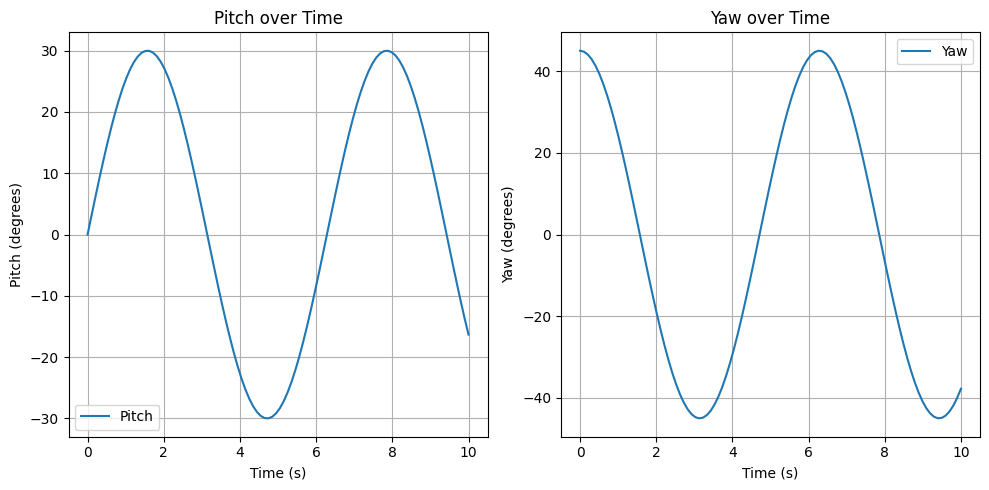

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: replace these with your actual data arrays
times = np.linspace(0, 10, 100)  # Simulated time from 0 to 10 seconds
pitch = np.sin(times) * 30       # Simulated pitch data in degrees
yaw = np.cos(times) * 45         # Simulated yaw data in degrees

plt.figure(figsize=(10, 5))

# Plotting Pitch
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(times, pitch, label='Pitch')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (degrees)')
plt.title('Pitch over Time')
plt.grid(True)
plt.legend()

# Plotting Yaw
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(times, yaw, label='Yaw')
plt.xlabel('Time (s)')
plt.ylabel('Yaw (degrees)')
plt.title('Yaw over Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
